# Here we make a Random Forest Model For Prochlorococcus


In [72]:
# Running model preperation notebook that has a function we need to call
%run /Users/cristianswift/Desktop/armbrust-lab/Seaflow-Machine-Learning/python/04_Populations-model-fitting/01_model-preparation.ipynb


/var/folders/w6/gkpzzsjx0n101092kzm2dnh00000gn/T/ipykernel_28737/510791959.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  covari.resample('60min', on='time').mean(numeric_only=False)


In [73]:
#loading packages for random forest modeling

from sklearn.model_selection import train_test_split
import joblib

## RF Regressor for Prochlorococcus

### First we are making a graph to determine the best testing to training ratio 

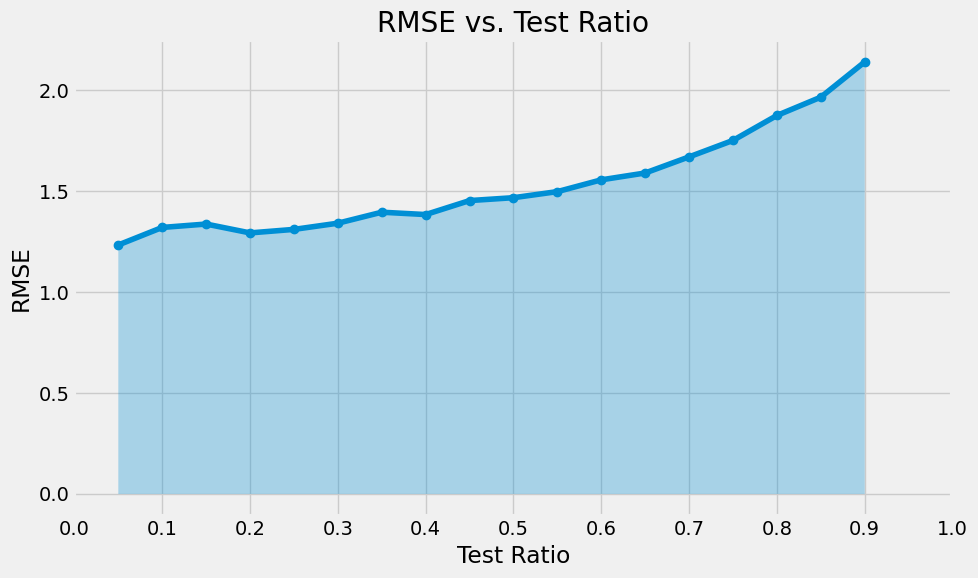

In [74]:
#using a function defined in the model prepe ration notebook
RMSEs = testing_training_ratio(features = features_pro, labels = labels_pro, feature_list=feature_list_pro)

## RF Regressor for Prochlorococcus

In [75]:
# Using Skicit-learn to split data into training and testing sets
# Split the data into training and testing sets"
train_features, test_features, train_labels, test_labels = train_test_split(features_pro, labels_pro, test_size = 0.7, random_state = 42)

/Users/cristianswift/opt/anaconda3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/cristianswift/opt/anaconda3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/cristianswift/opt/anaconda3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


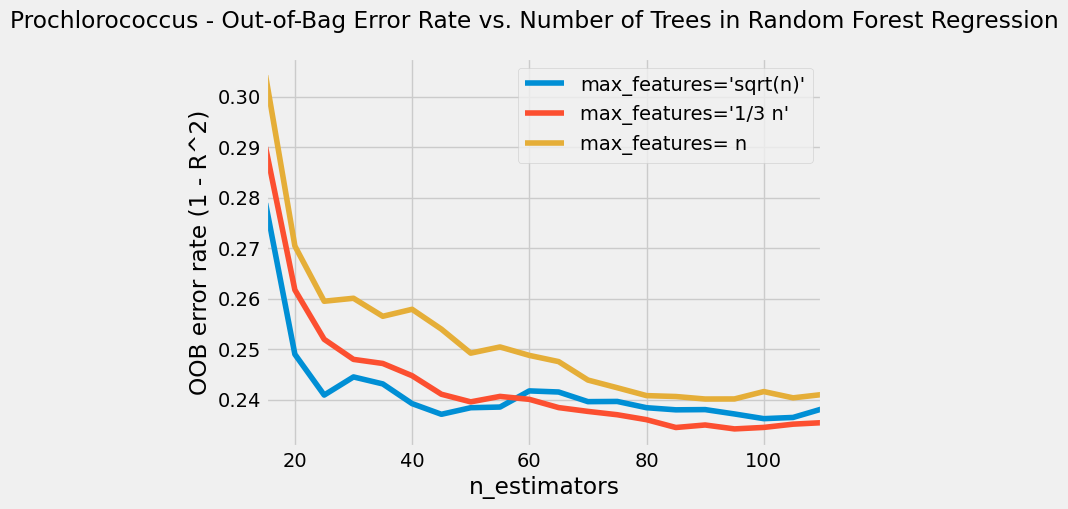

In [76]:
plot_oob_error_vs_num_trees(train_features, train_labels, title_prefix="Prochlorococcus")

In [77]:
# Looking at the shape of the features and labels to see if they match up
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (717, 22)
Training Labels Shape: (717,)
Testing Features Shape: (1676, 22)
Testing Labels Shape: (1676,)


In [78]:
# We are using a regressor RF model because we are predicting on continous values
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Use the Training data to build the model
rf.fit(train_features, train_labels)
#saving the model
joblib.dump(rf, "/Users/cristianswift/Desktop/armbrust-lab/Seaflow-Machine-Learning/RF_models/pro_random_forest.joblib")


['/Users/cristianswift/Desktop/armbrust-lab/Seaflow-Machine-Learning/RF_models/pro_random_forest.joblib']

### Predicting and Testing for Prochlorococus

PO4      0.383402
salin    0.128543
temp     0.105890
DIC      0.094101
FeT      0.063143
par      0.054153
O2       0.050274
NO3      0.028338
DOC      0.025703
NH4      0.024282
PIC      0.017690
POSi     0.006107
NO2      0.004225
PON      0.002981
POC      0.002435
DON      0.002387
SiO2     0.002293
DOFe     0.002059
ALK      0.001397
CDOM     0.000413
POFe     0.000119
DOP      0.000065
dtype: float64

In [79]:
# Convert test_features to a DataFrame
test_features_df = pd.DataFrame(test_features, columns=feature_list_pro)

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Create a new Series with predicted values and index from test_features_df
predic_biomass = pd.Series(predictions, index=test_features_df.index)

# Assign the new Series to the DataFrame using .loc
test_features_df.loc[:, 'Prediction'] = predic_biomass

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_labels, predictions)
print('Mean Absolute Error:', round(mae, 2), 'pgC per L.')

# Finding the root mean square error (RMSE)
from sklearn.metrics import mean_squared_error
# RMSE give realtively high weight to large errors 
RMSE = mean_squared_error(test_labels, predictions, squared=False) #setting squared=False gives us RMSE not MSE
print('Root Mean Squre Error:', round(RMSE, 2), 'pgC per L.')


Mean Absolute Error: 1.1 pgC per L.
Root Mean Squre Error: 1.67 pgC per L.


In [80]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list_pro, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

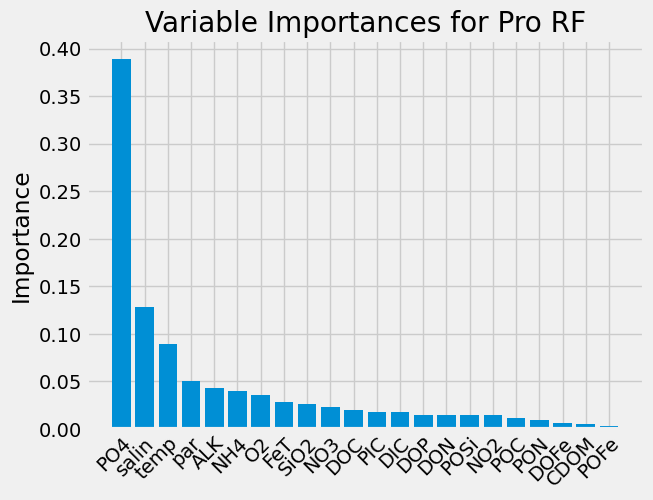

In [81]:
feature_importance = pd.DataFrame(rf.feature_importances_, index=feature_list_pro).sort_values(by=0, ascending=False)

# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# Make a bar chart
plt.bar(x=feature_importance.index,height=feature_importance[0], orientation = 'vertical')
# Tick labels for x axis
plt.xticks(feature_importance.index, rotation=45, ha='right', rotation_mode='anchor')

# Axis labels and title
plt.ylabel('Importance'); plt.title('Variable Importances for Pro RF');

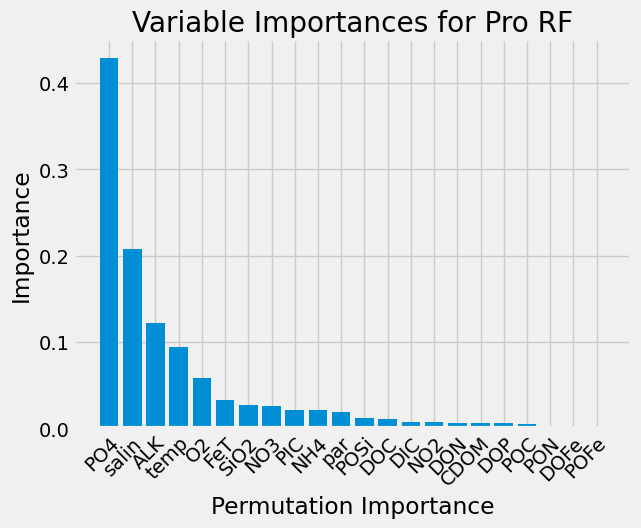

In [112]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate permutation importance
perm_importance = permutation_importance(rf, test_features, test_labels)

sorted_idx = perm_importance.importances_mean.argsort()[::-1]
feature_list_pro_arr = np.array(feature_list_pro)  # Convert feature_list_pro to a NumPy array
plt.bar(feature_list_pro_arr[sorted_idx], perm_importance.importances_mean[sorted_idx], orientation = 'vertical')
# Tick labels for x axis
plt.xticks(feature_importance.index, rotation=45, ha='right', rotation_mode='anchor')

plt.xlabel("Permutation Importance")

plt.style.use('fivethirtyeight')
# Make a bar chart

# Axis labels and title
plt.ylabel('Importance'); plt.title('Variable Importances for Pro RF');


/var/folders/w6/gkpzzsjx0n101092kzm2dnh00000gn/T/ipykernel_28737/1847421634.py:40: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=test_labels, y=predictions, shade=True, cmap="Blues", ax=ax2)


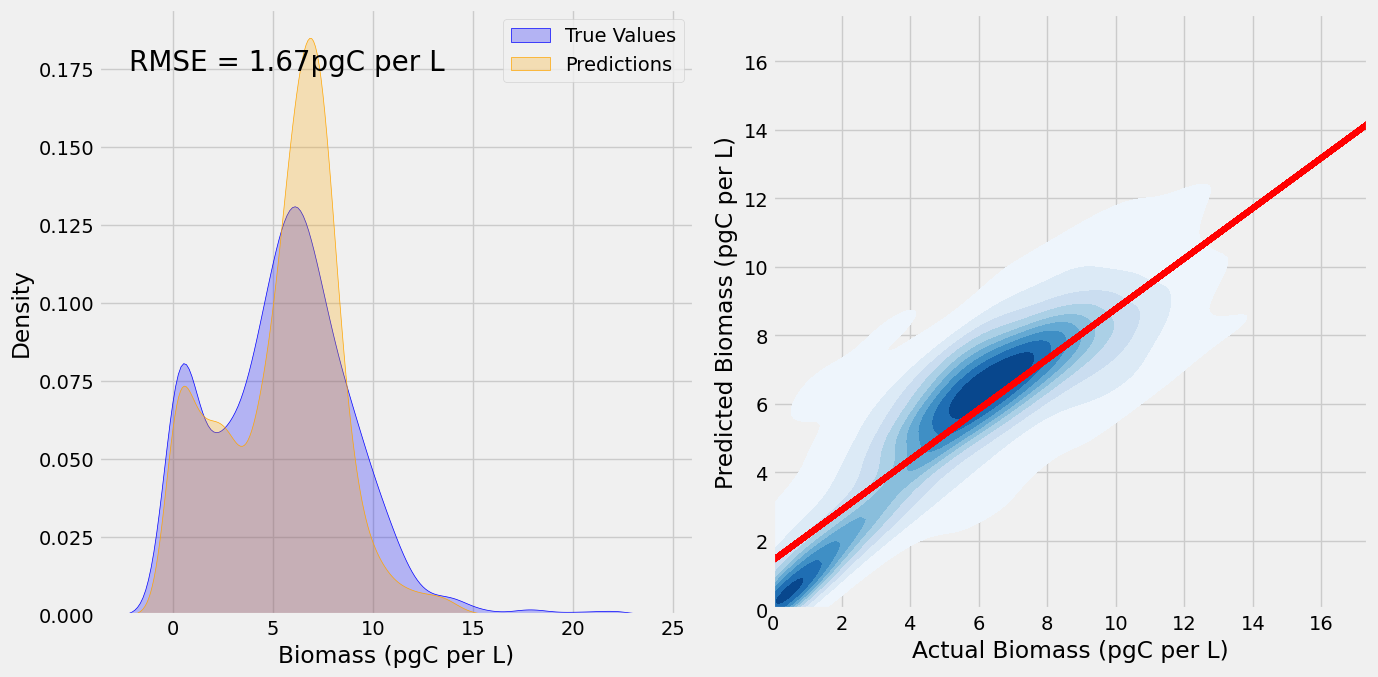

In [82]:
plot_model_predictions()